In [47]:
## D - Q1. Identifying the Closest Driver (7 Points)

In [1]:
def closest_dispatch(locations, origin, destination):
    total_distance = 0
    closest_driver = ''
    for driver, location in locations.items():
        # Calculate the each driver's travel distance.
        pickup_distance = abs(origin[0] - location[0]) + abs(origin[1] - location[1])
        ride_distance = abs(destination[0] - origin[0]) + abs(destination[1] - origin[1])
        driver_distance = pickup_distance + ride_distance
        current_driver = driver

        # If it is the first driver, add it.
        if total_distance == 0:
            total_distance = driver_distance
            closest_driver = current_driver
        
        # Keep track of best distance and closest driver.
        if driver_distance < total_distance:
            total_distance = driver_distance
            closest_driver = current_driver

    return closest_driver, total_distance

In [3]:
# Sample run 1
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[10,13],[10,60])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

# Output should be: Closest driver: Alice   Travel distance: 64

Closest driver: Alice 	Travel distance: 64


In [5]:
# Sample run 2
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[10,12],[-10,10.5])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

# Output should be: Closest driver: Bob     Travel distance: 38.5

Closest driver: Bob 	Travel distance: 38.5


In [7]:
# Sample run 3
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[7.6,11],[20,30])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

# Output should be: Closest driver: Bob     Travel distance: 49.8

Closest driver: Bob 	Travel distance: 49.8


In [9]:
# Sample run 4
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[7.4,11],[20,30.1])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

# Output should be: Closest driver: Charles         Travel distance: 50.1

Closest driver: Charles 	Travel distance: 50.1


In [174]:
## D - Q2. Queuing at Airport Pickup Station (8 Points): Try to break it down to pieces.

In [21]:
passengers=[5,10,20,5,0,0,0,0,15,0]
drivers=[20,0,0,0,0,30,40,20,0,0]
k=10

minutes = range(len(passengers))

print('Minutes\tP_arr\tD_arr\tP_total\tD_total\tPickup\tP_left\tD_left\tP_Q\tD_Q')

P_left = 0
D_left = 0

for minute in minutes:
    i = minute

    # Passenger & drivers arrivals for each minute
    P_arr = passengers[i]
    D_arr = drivers[i]

    # Total passengers & drivers waiting (including passengers & drivers who were waiting from a minute ago)
    P_total = P_arr + P_left
    D_total = D_arr + D_left

    # Queue
    P_Q = P_total
    D_Q = D_total

    # Pickup
    if P_total > D_total:
        P_pickup = min(D_total, k)
        D_pickup = P_pickup
    else: # P_total <= D_total
        P_pickup = min(P_total, k)
        D_pickup = P_pickup

    # Left: how many passengers & drivers are still waiting
    P_left = P_total - P_pickup
    D_left = D_total - D_pickup

    print(f'{i}\t{P_arr}\t{D_arr}\t{P_total}\t{D_total}\t{P_pickup}\t{P_left}\t{D_left}\t{P_Q}\t{D_Q}')

Minutes	P_arr	D_arr	P_total	D_total	Pickup	P_left	D_left	P_Q	D_Q
0	5	20	5	20	5	0	15	5	20
1	10	0	10	15	10	0	5	10	15
2	20	0	20	5	5	15	0	20	5
3	5	0	20	0	0	20	0	20	0
4	0	0	20	0	0	20	0	20	0
5	0	30	20	30	10	10	20	20	30
6	0	40	10	60	10	0	50	10	60
7	0	20	0	70	0	0	70	0	70
8	15	0	15	70	10	5	60	15	70
9	0	0	5	60	5	0	55	5	60


In [25]:
passengers=[5,10,20,5,0,0,0,0,15,0]
drivers=[20,0,0,0,0,30,40,20,0,0]
k=10

minutes = range(len(passengers))

print('Minutes\tP_arr\tD_arr\tP_Q\tD_Q\tPickups')

P_left = 0
D_left = 0

for minute in minutes:
    i = minute

    # Passenger & drivers arrivals for each minute
    P_arr = passengers[i]
    D_arr = drivers[i]

    # Total passengers & drivers waiting (including passengers & drivers who were waiting from a minute ago)
    P_total = P_arr + P_left
    D_total = D_arr + D_left

    # Queue
    P_Q = P_total
    D_Q = D_total

    # Pickup
    if P_total > D_total:
        P_pickup = min(D_total, k)
        D_pickup = P_pickup
    else: # P_total <= D_total
        P_pickup = min(P_total, k)
        D_pickup = P_pickup

    # Left: how many passengers & drivers are still waiting
    P_left = P_total - P_pickup
    D_left = D_total - D_pickup

    print(f'{i}\t{P_arr}\t{D_arr}\t{P_Q}\t{D_Q}\t{P_pickup}')

Minutes	P_arr	D_arr	P_Q	D_Q	Pickups
0	5	20	5	20	5
1	10	0	10	15	10
2	20	0	20	5	5
3	5	0	20	0	0
4	0	0	20	0	0
5	0	30	20	30	10
6	0	40	10	60	10
7	0	20	0	70	0
8	15	0	15	70	10
9	0	0	5	60	5


In [37]:
def airport_queue(passengers, drivers, k):
    minutes = len(passengers)
    
    P_left = 0
    D_left = 0
    P_waiting_list = []
    D_waiting_list = []
    
    for minute in range(minutes):
        i = minute
    
        # Passenger & drivers arrivals for each minute
        P_arr = passengers[i]
        D_arr = drivers[i]
    
        # Total passengers & drivers waiting (including passengers & drivers who were waiting from a minute ago)
        P_total = P_arr + P_left
        D_total = D_arr + D_left
    
        # Queue
        P_Q = P_total
        D_Q = D_total
        P_waiting_list.append(P_Q)
        D_waiting_list.append(D_Q)
    
        # Pickup
        if P_total > D_total:
            P_pickup = min(D_total, k)
            D_pickup = P_pickup
        else: # P_total <= D_total
            P_pickup = min(P_total, k)
            D_pickup = P_pickup
    
        # Left: how many passengers & drivers are still waiting
        P_left = P_total - P_pickup
        D_left = D_total - D_pickup
    
    P_avg_waiting_time = sum(P_waiting_list) / sum(passengers)
    D_avg_waiting_time = sum(D_waiting_list) / sum(drivers)
    return P_avg_waiting_time, D_avg_waiting_time

In [39]:
# Sample run 1 passengers=[5,10,20,5,0,0,0,0,15,0]
drivers=[20,0,0,0,0,30,40,20,0,0]
k=10
passenger_wait,driver_wait=airport_queue(passengers,drivers,k)
print(f'Av. waiting time for passengers is {round(passenger_wait,2)} minutes.')
print(f'Av. waiting time for drivers is {round(driver_wait,2)} minutes.')

# Output should be: 
# Av. waiting time for passengers is 2.27 minutes.
# Av. waiting time for drivers is 3.0 minutes.

Av. waiting time for passengers is 2.27 minutes.
Av. waiting time for drivers is 3.0 minutes.


In [3]:
## Q3. Simulating a Driver’s Movements (9 Points)
## Not likely to be in the mid-term.

locations = ['Downtown', 'Airport']

initial = 'Airport'

transition_probs={'Downtown':[0,1],'Airport':[1,0]}
- When the driver is in Downtown, there is a 100% chance that the driver will go to the Airport.
- When the driver is in Airport, there is a 100% chance that the driver will go to the Downtown.

df_a=df_b=pd.DataFrame([[0,50],[70,0]],index=locations,columns=locations)
- When the driver goes from Downtown to Downtown, it will take 0 minutes, from Downtown to Airport, it will take 50 minutes.
- When the driver goes from Airport to Downtown, it will take 70 minutes, from Airport to Airport, it will take 0 minutes.

df_earnings=pd.DataFrame([[0,30],[40,0]],index=locations,columns=locations)
- When the driver goes from Downtown to Downtown, the driver will earn $0, from Downtown to Airport, the driver will earn $30.
- When the driver goes from Airport to Downtown, the driver will earn $40, from Airport to Airport, the driver will earn $0.

n = 10
- Driver has to drive less than or equal to 10 times.

T = 190
- Driver has to drive less than or equal to 190 minutes.

In [5]:
# Sample run #1

locations = ['Downtown', 'Airport']
current_location = 'Airport'
next_location = ''

d_to_a_time = 50
a_to_d_time = 70

cumulative_time = 0

d_to_a_earning = 30
a_to_d_earning = 40

cumulative_earning = 0

n = 10
T = 190

print('# \t Current \t Next \t\t Time \t C_Time \t Earning \t C_Earning')

from numpy.random import default_rng
rng = default_rng()

for i in range(n): 
    if cumulative_time >= T:
        break
    else:   
        driver_time = 0
        driver_earning = 0
        if i == 0:
            if current_location == 'Downtown':
                next_location = rng.choice(['Downtown', 'Airport'], p=[0,1])
            else: # current_location == 'Airport'
                next_location = rng.choice(['Downtown', 'Airport'], p=[1,0])
        else: 
            current_location = next_location
            if current_location == 'Airport':
                driver_time = d_to_a_time
                driver_earning = d_to_a_earning
                next_location = rng.choice(['Downtown', 'Airport'], p=[1,0])
            elif current_location == 'Downtown':
                driver_time = a_to_d_time
                driver_earning = a_to_d_earning
                next_location = rng.choice(['Downtown', 'Airport'], p=[0,1])
        cumulative_time += driver_time
        cumulative_earning += driver_earning
    print(f'{i} \t {current_location} \t {next_location} \t {driver_time} \t {cumulative_time} \t\t {driver_earning} \t\t {cumulative_earning}')

# 	 Current 	 Next 		 Time 	 C_Time 	 Earning 	 C_Earning
0 	 Airport 	 Downtown 	 0 	 0 		 0 		 0
1 	 Downtown 	 Airport 	 70 	 70 		 40 		 40
2 	 Airport 	 Downtown 	 50 	 120 		 30 		 70
3 	 Downtown 	 Airport 	 70 	 190 		 40 		 110


In [7]:
# Given Answer - Modified by me

from numpy.random import default_rng

def driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,n,T):
    rng = default_rng()
    current_location = initial
    trip_time = 0
    earnings = 0
    timeList = [trip_time]
    locationList = [current_location]
    earningsList = [earnings]
    for i in range(n):

        # Probability of moving to new location
        new_location = rng.choice(locations, p = transition_probs[current_location])

        # Trip time
        trip_time += rng.uniform(df_a.loc[current_location, new_location],df_b.loc[current_location, new_location])

        # Earnings
        earnings += df_earnings.loc[current_location, new_location]

        # Change the next current location to new location
        current_location = new_location

        # Keep track
        timeList.append(trip_time)
        locationList.append(current_location)
        earningsList.append(earnings)

        # Trip time must be less than or equal to T.
        if trip_time>=T:
            break
    return timeList, locationList, earningsList

In [143]:
# Sample run 1 (deterministic example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0,1],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[0,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[0,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,190)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
120.0	Airport   	70
190.0	Downtown  	110


In [149]:
# Sample run 2 (randomized example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0.7,0.3],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[5,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[10,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,400)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
75.0	Downtown  	50
125.0	Airport   	80
195.0	Downtown  	120
200.0	Downtown  	130
205.0	Downtown  	140
210.0	Downtown  	150
260.0	Airport   	180
330.0	Downtown  	220
380.0	Airport   	250


In [155]:
# Sample run 1 (deterministic example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0,1],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[0,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[0,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,190)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
120.0	Airport   	70
190.0	Downtown  	110


In [161]:
# Sample run 2 (randomized example)
import pandas as pd
locations=['Downtown', 'Airport']
initial='Airport'
transition_probs={'Downtown':[0.7,0.3],'Airport':[1,0]}
df_a=df_b=pd.DataFrame([[5,50],[70,0]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[10,30],[40,0]],index=locations,columns=locations)
t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,400)
print('Time\tLocation\tCumulative Earnings')
for i in range(len(t)):
    print(f'{t[i]}\t{l[i]:10}\t{e[i]}')

Time	Location	Cumulative Earnings
0	Airport   	0
70.0	Downtown  	40
120.0	Airport   	70
190.0	Downtown  	110
195.0	Downtown  	120
200.0	Downtown  	130
205.0	Downtown  	140
210.0	Downtown  	150
215.0	Downtown  	160
220.0	Downtown  	170
225.0	Downtown  	180


Average earning: 	$126		 Std: 17
Average end time: 	211 minutes	 Std: 24


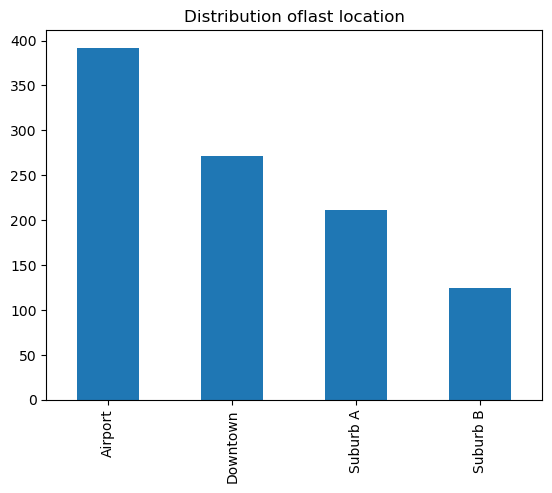

In [171]:
# Sample run 3
import pandas as pd
locations=['Downtown','Airport','Suburb A','Suburb B']
initial='Suburb A'
transition_probs={'Downtown': [0.1,0.2,0.3,0.4],'Airport':[0.5,0,0.3,0.2],'Suburb A':[0.4,0.4,0.1,0.1],'Suburb B':[0.3,0.5,0.2,0]}
df_a=pd.DataFrame([[5,30,20,15],[50,5,60,30],[25,80,5,50],[20,40,50,5]],index=locations,columns=locations)
df_b=pd.DataFrame([[10,40,30,25],[60,5,90,60],[40,100,10,80],[30,50,80,10]],index=locations,columns=locations)
df_earnings=pd.DataFrame([[7,20,15,10],[40,0,50,30],[18,50,0,30],[15,30,40,0]],index=locations,columns=locations)

earnings=[]
last_location=[]
last_time=[]
for i in range(1000):
    t,l,e=driver_movement(locations,initial,transition_probs,df_a,df_b,df_earnings,10,180)
    earnings.append(e[-1])
    last_location.append(l[-1])
    last_time.append(t[-1])
import numpy as np
import matplotlib.pyplot as plt
print(f'Average earning: \t${np.mean(earnings):.0f}\t\t Std: {np.std(earnings):.0f}')
print(f'Average end time: \t{np.mean(last_time):.0f} minutes\t Std: {np.std(last_time):.0f}')
pd.Series(last_location).value_counts().plot(kind='bar',title='Distribution oflast location')
plt.show()